Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [5]:
import pandas as pd
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
# Create DataFrame
df=pd.DataFrame(data,index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [11]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


**3.** Return the first 3 rows of the DataFrame `df`.

In [13]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [21]:
select_column=df[['animal','age']]
select_column

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [25]:
select_data = df.iloc[[3, 4, 8]][['animal', 'age']]
select_data

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [31]:
filter_df = df[df['visits'] > 3]
print(filter_df)

Empty DataFrame
Columns: [animal, age, visits, priority]
Index: []


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [39]:
select_row=df[df['age'].isna()]
print(select_row)

  animal  age  visits priority
d    dog  NaN       3      yes
h    cat  NaN       1      yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [49]:
select_row=df[(df['animal']=='cat')&(df['age']<3)]
print(select_row)

  animal  age  visits priority
a    cat  2.5       1      yes
f    cat  2.0       3       no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [51]:
select_row=df[(df['age'] >= 2) & (df['age'] <= 4)]
print(select_row)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
f    cat  2.0       3       no
j    dog  3.0       1       no


**10.** Change the age in row 'f' to 1.5.

In [55]:
df.loc['f', 'age'] = 1.5
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [69]:
sum_visits=df['visits'].sum()
sum_visits

19

**12.** Calculate the mean age for each different animal in `df`.

In [71]:
age_mean= df.groupby('animal')['age'].mean()
age_mean

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [81]:
new_row = pd.DataFrame({'animal': ['goat'], 'age': [2.0], 'visits': [3], 'priority': ['yes']}, index=['k'])

# Append the new row to the DataFrame using pd.concat
df = pd.concat([df, new_row])
# Display the DataFrame after appending the new row
print("DataFrame after appending new row 'k':")
print(df)

DataFrame after appending new row 'k':
  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no
k   goat  2.0       3      yes


In [83]:
df = df.drop('k')

# Display the DataFrame after deleting the new row
print("\nDataFrame after deleting row 'k':")
print(df)


DataFrame after deleting row 'k':
  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


**14.** Count the number of each type of animal in `df`.

In [85]:
df['animal'].value_counts()

animal
cat      4
dog      4
snake    2
Name: count, dtype: int64

**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [104]:
sorted_df = df.sort_values(by=['age', 'visits'], ascending=[False, True])
# Display the sorted DataFrame
print("\nSorted DataFrame:")
print(sorted_df)


Sorted DataFrame:
  animal  age  visits priority
i    dog  7.0       2       no
e    dog  5.0       2       no
g  snake  4.5       1       no
j    dog  3.0       1       no
b    cat  3.0       3      yes
a    cat  2.5       1      yes
f    cat  1.5       3       no
c  snake  0.5       2       no
h    cat  NaN       1      yes
d    dog  NaN       3      yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [107]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})
print(df)

  animal  age  visits  priority
a    cat  2.5       1      True
b    cat  3.0       3      True
c  snake  0.5       2     False
d    dog  NaN       3      True
e    dog  5.0       2     False
f    cat  1.5       3     False
g  snake  4.5       1     False
h    cat  NaN       1      True
i    dog  7.0       2     False
j    dog  3.0       1     False


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [109]:
df['animal'] = df['animal'].replace('snake', 'python')
print(df)

   animal  age  visits  priority
a     cat  2.5       1      True
b     cat  3.0       3      True
c  python  0.5       2     False
d     dog  NaN       3      True
e     dog  5.0       2     False
f     cat  1.5       3     False
g  python  4.5       1     False
h     cat  NaN       1      True
i     dog  7.0       2     False
j     dog  3.0       1     False


**18.** Load the ny-flights dataset to Python

In [113]:
data=pd.read_csv('ny-flights (2).csv')
data

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9742,2014-01-15 00:00:00,DL,19790,N3762Y,2038,JFK,SJU,1455.0,-4.0,1956.0,-1.0,0.0,2014-01-15 19:56:00,2014-01-15 14:55:00
9743,2014-01-15 00:00:00,DL,19790,N394DA,2046,JFK,SJU,651.0,-4.0,1216.0,31.0,0.0,2014-01-15 12:16:00,2014-01-15 06:51:00
9744,2014-01-15 00:00:00,DL,19790,N900PC,2047,LGA,ATL,758.0,-1.0,1046.0,8.0,0.0,2014-01-15 10:46:00,2014-01-15 07:58:00
9745,2014-01-15 00:00:00,DL,19790,N3743H,2065,JFK,FLL,1636.0,20.0,1950.0,11.0,0.0,2014-01-15 19:50:00,2014-01-15 16:36:00


**19.** Which airline ID is present maximum times in the dataset

In [137]:
# Count occurrences of each airline ID
airline_count = data['airline_id'].value_counts()
# Identify the airline ID with the maximum count
max_airline_id = airline_count.idxmax()
max_count = airline_count.max()
print(f"The airline ID present the maximum number of times is: {max_airline_id}")
print(f"It appears {max_count} times in the dataset.")

The airline ID present the maximum number of times is: 20409
It appears 2429 times in the dataset.


**20.** Draw a plot between dep_delay and arr_delay

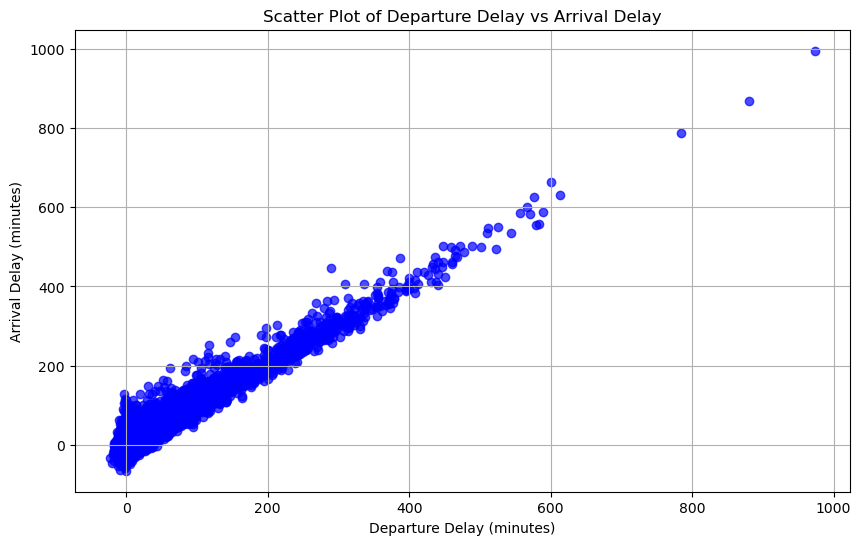

In [143]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data['dep_delay'], data['arr_delay'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True)
plt.show()